In [1]:
## load the import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [23]:
df_X = pd.read_csv('Train_60\Train_60\X_Train_Data_Input.csv')
df_Y = pd.read_csv('Train_60\Train_60\Y_Train_Data_Target.csv')

In [21]:
df_X.head()

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,ad1a67e4cbddc767a3456b0d94299b9e,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
1,7246d2f76ac0c217ec25e72ea5f014cb,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
2,22ba388e7dd14c13342c49e75fc29dda,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,NaN,NaN,NaN,-0.407939,-0.015607,-0.774979,...,0,0,NaN,0.00339,0.0,0,1.0,0,0,0
4,f6317cf7ecf126859804eddff279aead,0.0,718,950.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,...,0,0,NaN,0.00339,0.0,0,0.0,0,0,0


In [4]:
df_X.describe()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
count,785124.000000,785133.000000,785133.000000,658830.000000,657423.000000,617953.000000,781283.000000,785133.000000,781283.000000,52996.000000,...,785133.000000,785133.000000,419430.000000,768677.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000
mean,0.440757,1321.788614,2951.279411,-0.000210,-0.000855,-0.000367,-0.000709,0.000727,-0.000158,0.005245,...,0.363122,0.328285,-0.000863,-0.000837,0.001206,0.270092,0.147856,0.018759,0.009351,0.002757
std,1.163275,907.267965,2143.140140,0.999935,1.000350,1.015255,0.998984,1.045883,1.056769,1.111058,...,0.480900,0.469589,1.291202,1.283393,0.034855,3.128214,0.430530,0.135671,0.096249,0.052439
min,0.000000,-1080.000000,-47.000000,-2.028572,-1.855728,-0.007469,-0.407939,-0.015607,-0.774979,-0.088554,...,0.000000,0.000000,-832.749615,-1091.545904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,515.000000,1129.000000,-0.675216,-0.577162,-0.007469,-0.407939,-0.015607,-0.774979,-0.086503,...,0.000000,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1173.000000,2709.000000,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,-0.081820,...,0.000000,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2435.000000,4472.000000,0.678139,0.701403,-0.007468,-0.367723,-0.015607,0.625528,-0.063140,...,1.000000,1.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.000000,2499.000000,10290.000000,0.678139,0.701403,551.421127,14.985817,201.687947,323.992484,133.911803,...,1.000000,1.000000,8.514416,0.012736,2.000000,728.000000,12.000000,1.000000,1.000000,1.000000


In [5]:
df_X.isnull().sum()

ID               0
Column0          9
Column1          0
Column2          0
Column3     126303
Column4     127710
Column5     167180
Column6       3850
Column7          0
Column8       3850
Column9     732137
Column10         0
Column11         0
Column12         0
Column13         0
Column14    365703
Column15     16456
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
dtype: int64

In [6]:

# Function to get descriptive statistics for a given array
def get_descriptive_statistics(arr):
    # Total number of values in the array
    num_values = len(arr)
    
    # Count NaN values
    num_nan_values = (np.isnan(arr).sum() / num_values) * 100
    
    # Filter finite and non-zero values
    finite_non_zero_values = arr[np.isfinite(arr) & (arr != 0)]
    num_finite_non_zero_values = len(finite_non_zero_values)
    
    # Count positive and negative values
    num_positive_values = (finite_non_zero_values > 0).sum()
    num_negative_values = (finite_non_zero_values < 0).sum()

    # Calculate descriptive statistics if there are finite non-zero values
    if num_finite_non_zero_values > 0:
        percentiles = np.percentile(finite_non_zero_values, [25, 50, 75])
        median = np.median(finite_non_zero_values)
        mean = np.mean(finite_non_zero_values)
        max_value = np.max(finite_non_zero_values)
        min_value = np.min(finite_non_zero_values)
        value_range = max_value - min_value  # Calculate the range
    else:
        percentiles = [np.nan, np.nan, np.nan]
        median = np.nan
        mean = np.nan
        max_value = np.nan
        min_value = np.nan
        value_range = np.nan

    return {
        "count_of_values": num_values,
        "percentage_of_nan_values": num_nan_values,
        "count_finite_non_zero": num_finite_non_zero_values,
        "count_of_positive": num_positive_values,
        "count_of_negative": num_negative_values,
        "25th_percentile": percentiles[0],
        "50th_percentile": percentiles[1],
        "75th_percentile": percentiles[2],
        "mean": mean,
        "max": max_value,
        "min": min_value,
        "range": value_range  # Include the range in the result
    }



In [7]:
feature_prefix = 'Column'
feats = [col for col in df_X.columns if col.startswith(feature_prefix)]

# Initialize a list to record descriptive statistics for each feature
data_stats_recorder = []

# Calculate and record descriptive statistics for each feature
for f in feats:
    feat_array = np.array(df_X[f])
    data_stats = get_descriptive_statistics(feat_array)
    data_stats_recorder.append(data_stats)

# Convert the list of dictionaries to a DataFrame
df_data_stats = pd.DataFrame(data_stats_recorder, index=feats)

# Transpose the DataFrame for better readability
df_data_stats_transpose = df_data_stats.T

# Display the DataFrame of descriptive statistics
display(df_data_stats_transpose)

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
count_of_values,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,...,785133.0,785133.0,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.0,785133.0,785133.0
percentage_of_nan_values,0.001146,0.000000,0.000000,16.086829,16.266034,21.293208,0.490363,0.000000,0.490363,93.250061,...,0.0,0.0,46.578478,2.095951,0.000000,0.000000,0.000000,0.0,0.0,0.0
count_finite_non_zero,155566.000000,749838.000000,785131.000000,658830.000000,657423.000000,617953.000000,781283.000000,785133.000000,781283.000000,52996.000000,...,285099.0,257747.0,419430.000000,768677.000000,943.000000,18436.000000,102407.000000,14728.0,7342.0,2165.0
count_of_positive,155566.000000,748190.000000,785126.000000,465845.000000,449526.000000,985.000000,137732.000000,5161.000000,400280.000000,5547.000000,...,285099.0,257747.0,419238.000000,763566.000000,943.000000,18436.000000,102407.000000,14728.0,7342.0,2165.0
count_of_negative,0.000000,1648.000000,5.000000,192985.000000,207897.000000,616968.000000,643551.000000,779972.000000,381003.000000,47449.000000,...,0.0,0.0,192.000000,5111.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25th_percentile,1.000000,587.000000,1129.000000,-0.675216,-0.577162,-0.007469,-0.407939,-0.015607,-0.774979,-0.086503,...,1.0,1.0,0.001351,0.003390,1.000000,2.000000,1.000000,1.0,1.0,1.0
50th_percentile,2.000000,1255.000000,2709.000000,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,-0.081820,...,1.0,1.0,0.001351,0.003390,1.000000,6.000000,1.000000,1.0,1.0,1.0
75th_percentile,2.000000,2453.000000,4472.000000,0.678139,0.701403,-0.007468,-0.367723,-0.015607,0.625528,-0.063140,...,1.0,1.0,0.001351,0.003390,1.000000,14.000000,1.000000,1.0,1.0,1.0
mean,2.224451,1384.005425,2951.286929,-0.000210,-0.000855,-0.000367,-0.000709,0.000727,-0.000158,0.005245,...,1.0,1.0,-0.000863,-0.000837,1.004242,11.502387,1.133585,1.0,1.0,1.0
max,18.000000,2499.000000,10290.000000,0.678139,0.701403,551.421127,14.985817,201.687947,323.992484,133.911803,...,1.0,1.0,8.514416,0.012736,2.000000,728.000000,12.000000,1.0,1.0,1.0


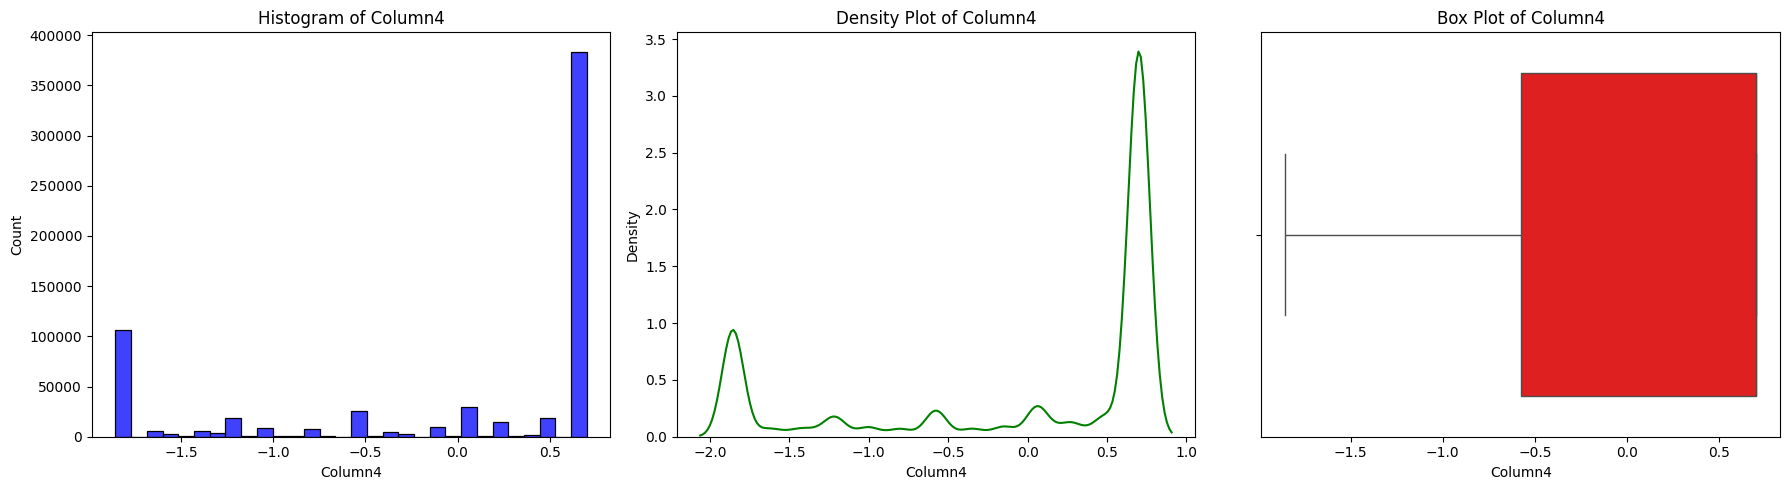

In [8]:
feature_name = 'Column4'  # Replace with your actual feature name

# Set up the matplotlib figure
plt.figure(figsize=(18, 5))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(df_X[feature_name], kde=False, bins=30, color='blue')
plt.title(f'Histogram of {feature_name}')

# Density Plot
plt.subplot(1, 3, 2)
sns.kdeplot(df_X[feature_name], color='green')
plt.title(f'Density Plot of {feature_name}')

# Box Plot
plt.subplot(1, 3, 3)
sns.boxplot(x=df_X[feature_name], color='red')
plt.title(f'Box Plot of {feature_name}')

plt.tight_layout()
plt.show()

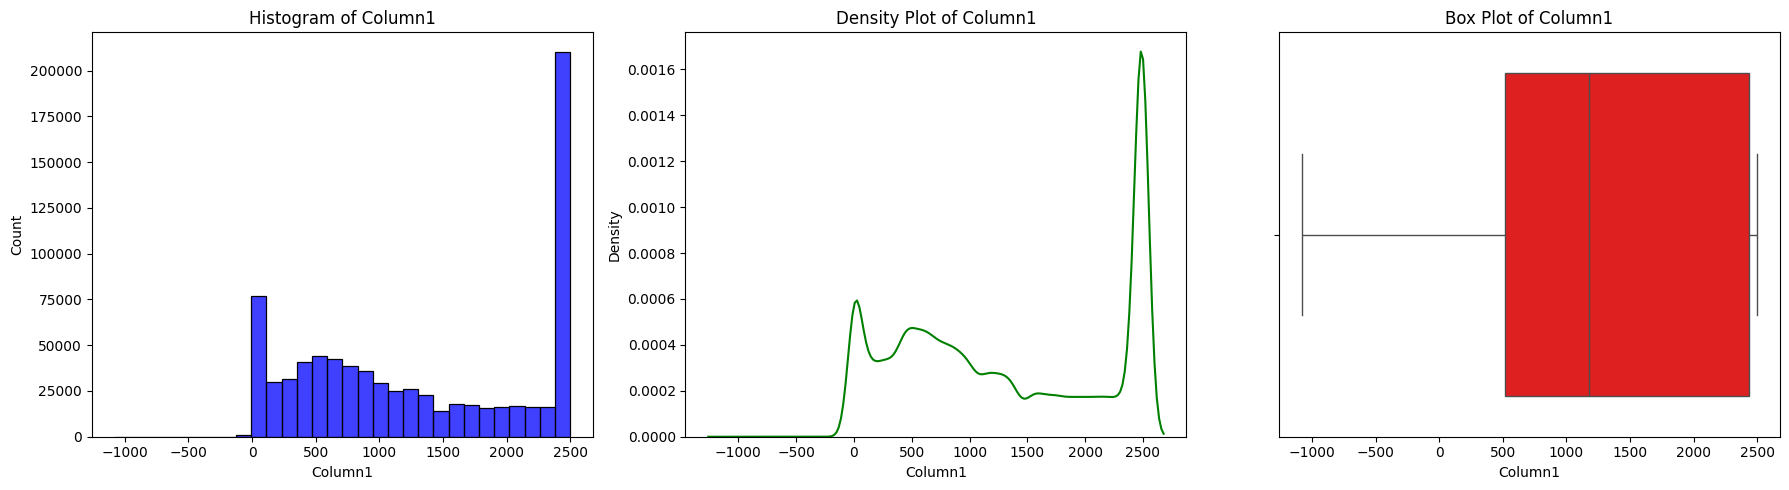

In [9]:
feature_name = 'Column1'  # Replace with your actual feature name

# Set up the matplotlib figure
plt.figure(figsize=(18, 5))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(df_X[feature_name], kde=False, bins=30, color='blue')
plt.title(f'Histogram of {feature_name}')

# Density Plot
plt.subplot(1, 3, 2)
sns.kdeplot(df_X[feature_name], color='green')
plt.title(f'Density Plot of {feature_name}')

# Box Plot
plt.subplot(1, 3, 3)
sns.boxplot(x=df_X[feature_name], color='red')
plt.title(f'Box Plot of {feature_name}')

plt.tight_layout()
plt.show()

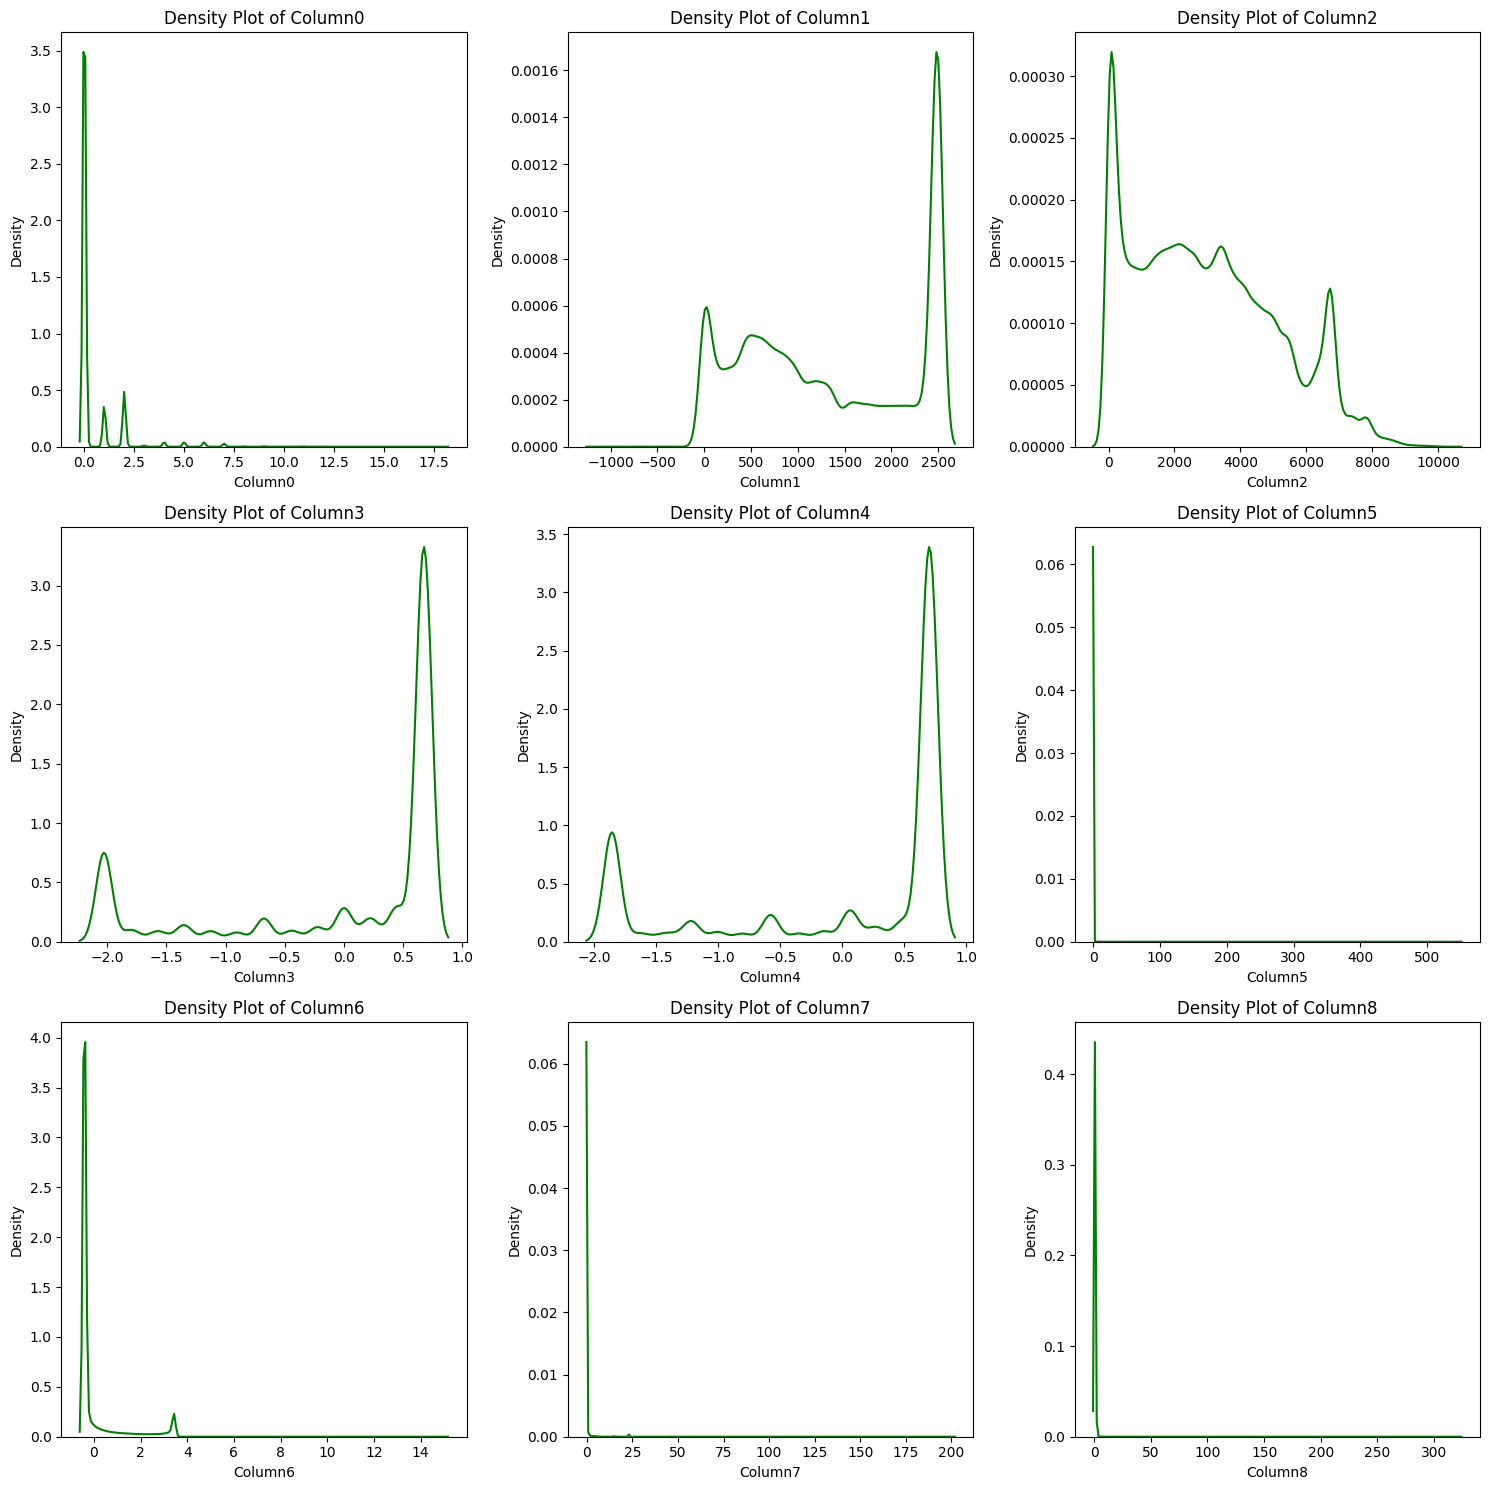

In [10]:
# Define the list of columns from Column0 to Column8 (9 columns total)
numerical_features = [f'Column{i}' for i in range(9)]

# Set up the number of rows and columns for the grid
n_cols = 3  # Number of columns in the grid
n_rows = (len(numerical_features) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Set up the matplotlib figure with a grid layout
plt.figure(figsize=(15, 5 * n_rows))  # Adjust the figure size based on the number of features

for i, feature_name in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(df_X[feature_name], color='green')
    plt.title(f'Density Plot of {feature_name}')

plt.tight_layout()
plt.show()

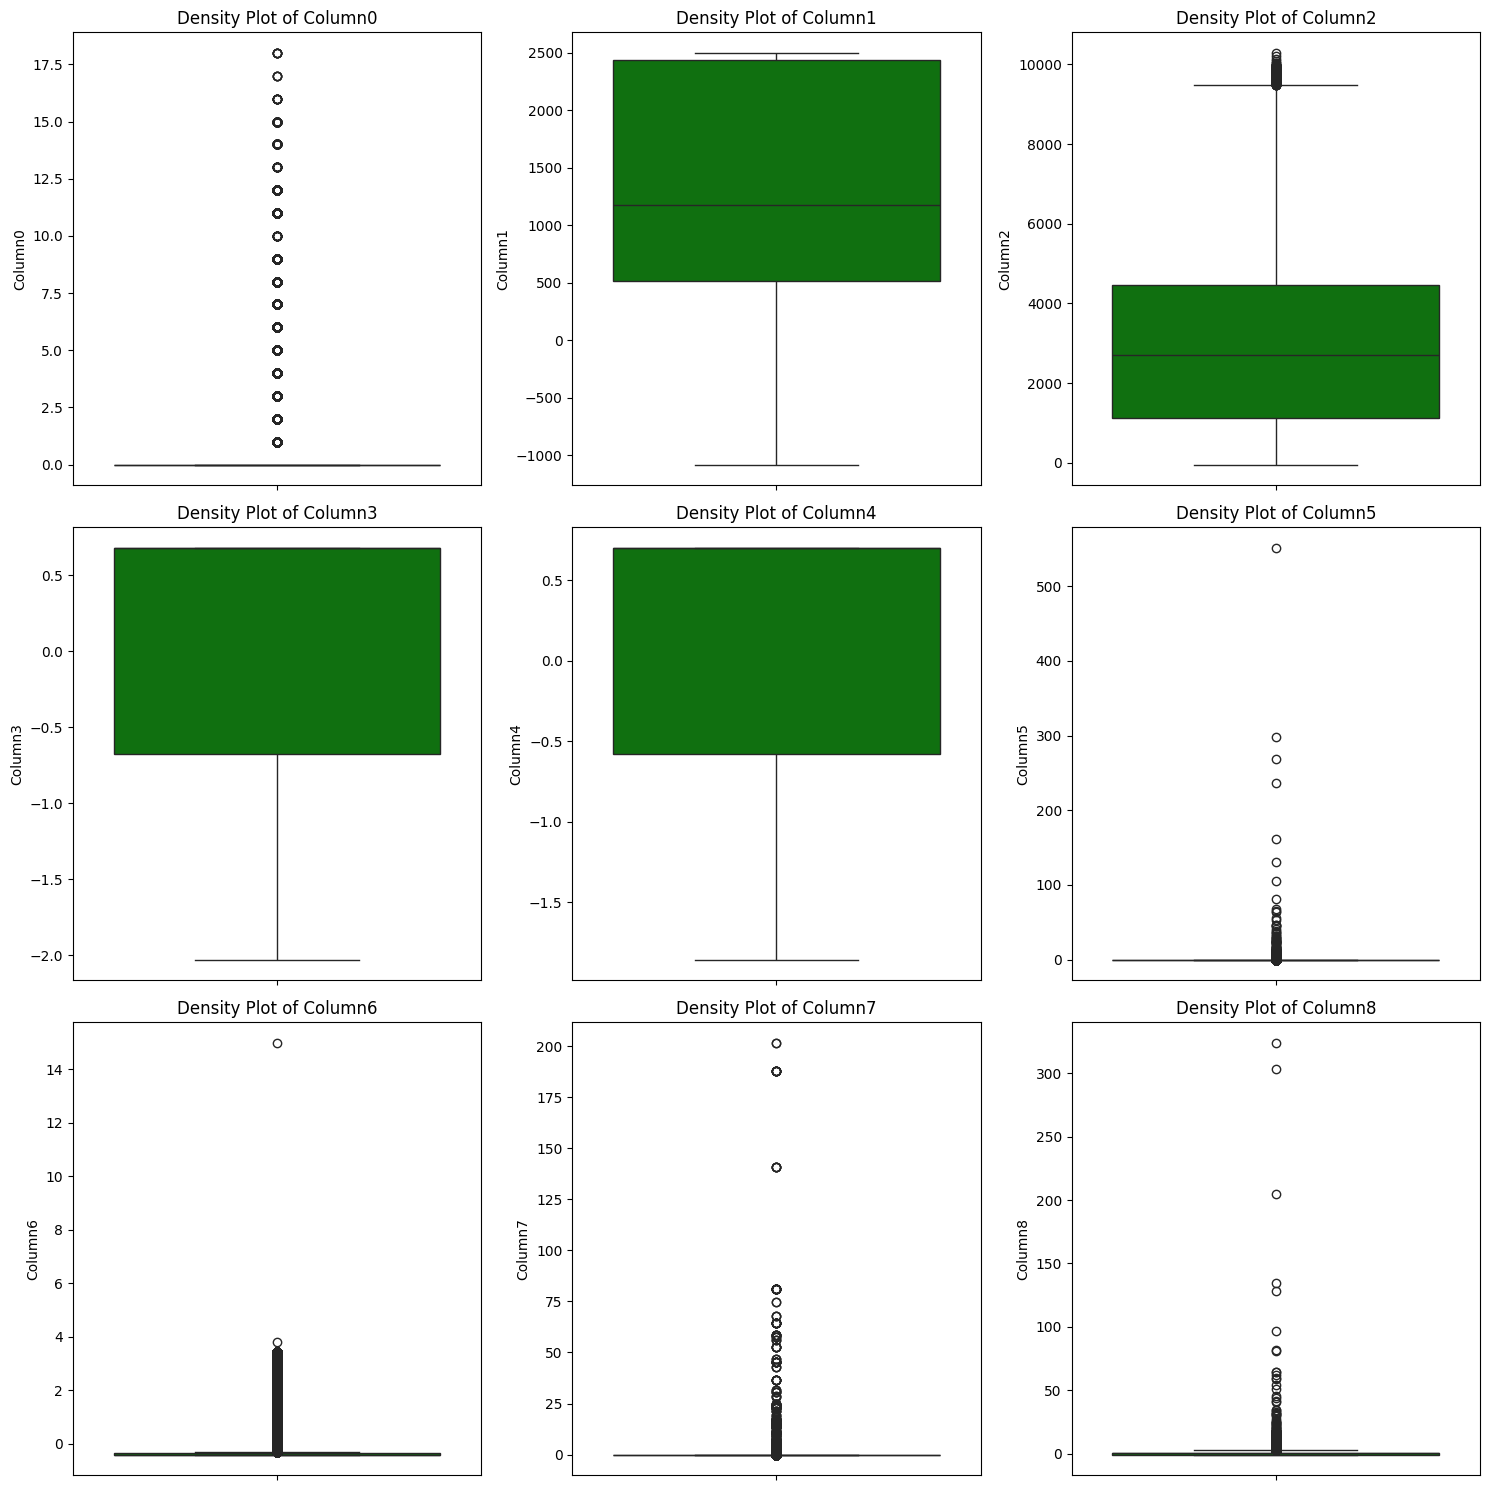

In [11]:
# Define the list of columns from Column0 to Column8 (9 columns total)
numerical_features = [f'Column{i}' for i in range(9)]

# Set up the number of rows and columns for the grid
n_cols = 3  # Number of columns in the grid
n_rows = (len(numerical_features) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Set up the matplotlib figure with a grid layout
plt.figure(figsize=(15, 5 * n_rows))  # Adjust the figure size based on the number of features

for i, feature_name in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(df_X[feature_name], color='green')
    plt.title(f'Density Plot of {feature_name}')

plt.tight_layout()
plt.show()

In [12]:
numerical_features = [f'Column{i}' for i in range(9)]

# Calculate skewness and kurtosis for each numerical feature
skewness_kurtosis = pd.DataFrame({
    'Feature': numerical_features,
    'Skewness': df_X[numerical_features].skew(),
    'Kurtosis': df_X[numerical_features].kurt()
})

# Display the results
print(skewness_kurtosis)

         Feature    Skewness       Kurtosis
Column0  Column0    4.074813      22.506434
Column1  Column1    0.078596      -1.511197
Column2  Column2    0.437539      -0.723360
Column3  Column3   -1.165275      -0.284689
Column4  Column4   -1.007385      -0.703438
Column5  Column5  366.846494  167500.843046
Column6  Column6    2.589699       5.443259
Column7  Column7  123.196128   18985.023291
Column8  Column8   86.605312   22725.306313


Skewness: Measures the asymmetry of the data distribution. A skewness value close to 0 indicates a symmetric distribution. Positive skewness indicates a right-skewed distribution, while negative skewness indicates a left-skewed distribution.

Kurtosis: Measures the "tailedness" or peakedness of the data distribution. A kurtosis value of 3 corresponds to a normal distribution. Values greater than 3 indicate a distribution with heavier tails (leptokurtic), and values less than 3 indicate lighter tails (platykurtic).

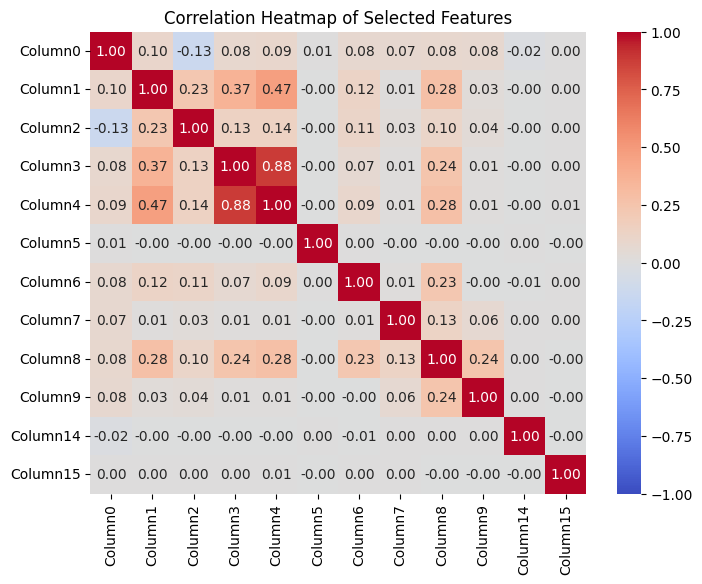

In [13]:
features = ['Column0','Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8','Column9', 'Column14','Column15']    

# Select only the features of interest
df_selected = df_X[features]

# Compute the correlation matrix
corr_matrix = df_selected.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

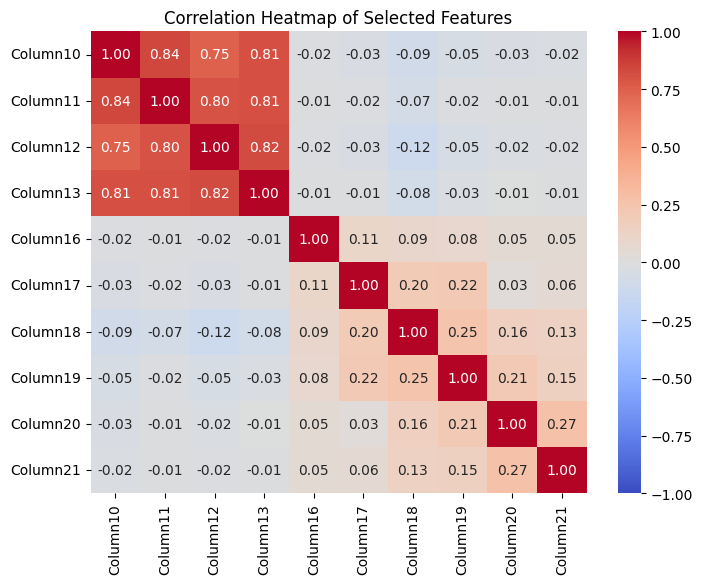

In [14]:
features = ['Column10','Column11', 'Column12', 'Column13', 'Column16', 'Column17', 'Column18', 'Column19', 'Column20', 'Column21']    

# Select only the features of interest
df_selected = df_X[features]

# Compute the correlation matrix
corr_matrix = df_selected.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

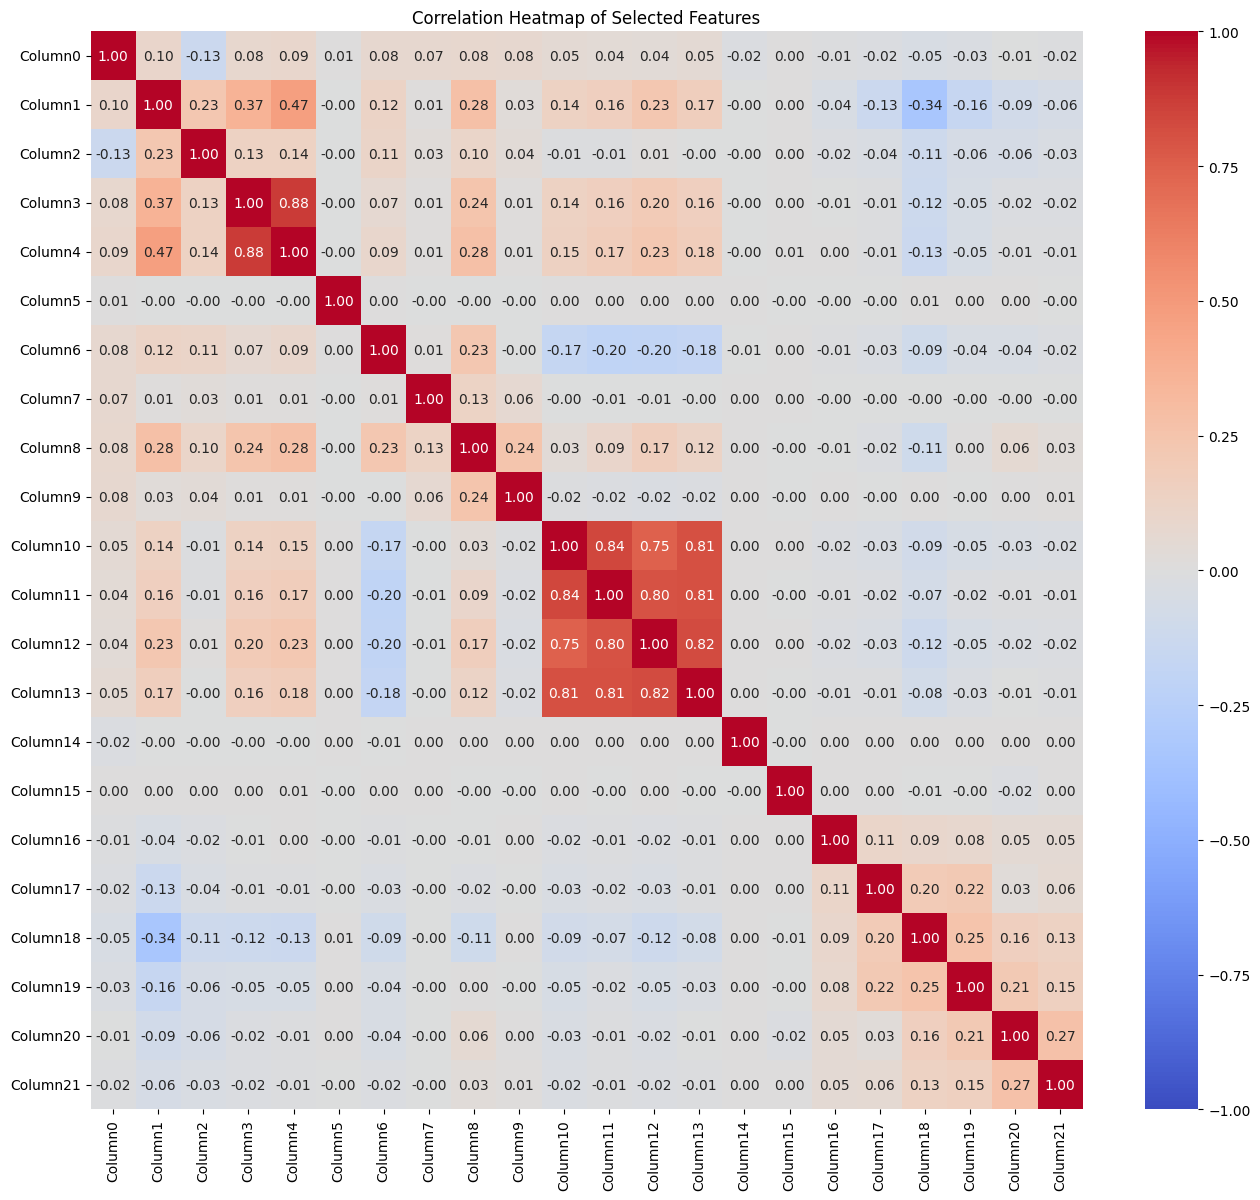

In [15]:
features = ['Column0','Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8','Column9','Column10','Column11', 'Column12', 'Column13', 'Column14','Column15','Column16', 'Column17', 'Column18', 'Column19', 'Column20', 'Column21']    

# Select only the features of interest
df_selected = df_X[features]

# Compute the correlation matrix
corr_matrix = df_selected.corr()

# Plot the heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

In [24]:
## droping the column9
df_X = df_X.drop(columns=['Column9', 'ID'])
df_Y = df_Y.drop(columns=['ID'])

In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

# Fit and transform the data
df_imputed = pd.DataFrame(imputer.fit_transform(df_X), columns=df_X.columns)

In [26]:
df_imputed.isnull().sum()

Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column10    0
Column11    0
Column12    0
Column13    0
Column14    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
dtype: int64

In [27]:
## lets apply standard scaling to the data
scaler = preprocessing.StandardScaler()
df_X_scaled = scaler.fit_transform(df_X)

df_X_scaled = pd.DataFrame(df_imputed, columns=df_X.columns)

In [28]:
## Lets split the data into training and validation set
X_train, X_val, y_train, y_val = train_test_split(df_X_scaled, df_Y, test_size=0.2, random_state=42)

In [29]:
## Applying the model random forestclassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print("Accuracy Score:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy Score: 0.9764435415565476
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    142275
           1       0.85      0.92      0.88     14752

    accuracy                           0.98    157027
   macro avg       0.92      0.95      0.93    157027
weighted avg       0.98      0.98      0.98    157027



In [31]:
## testing the model on the test data
df_Xtest = pd.read_csv('Test_20\Test_20\X_Test_Data_Input.csv')
df_Ytest = pd.read_csv('Test_20\Test_20\Y_Test_Data_Target.csv')

df_Xtest = df_Xtest.drop(columns=['Column9', 'ID'])
df_Ytest = df_Ytest.drop(columns=['ID'])

df_imputed_test = pd.DataFrame(imputer.transform(df_Xtest), columns=df_Xtest.columns)
df_Xtest_scaled = pd.DataFrame(scaler.transform(df_imputed_test), columns=df_Xtest.columns)

y_pred_test = rf_clf.predict(df_Xtest_scaled)
accuracy_test = accuracy_score(df_Ytest, y_pred_test)

print("Accuracy Score on Test Data:", accuracy_test)
print("Classification Report on Test Data:\n", classification_report(df_Ytest, y_pred_test))



Accuracy Score on Test Data: 0.9660084367549061
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    237034
           1       0.74      0.98      0.84     24678

    accuracy                           0.97    261712
   macro avg       0.87      0.97      0.91    261712
weighted avg       0.97      0.97      0.97    261712



In [32]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


In [33]:
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    objective='binary:logistic',  # Change if multi-class classification
    eval_metric='logloss',
    use_label_encoder=False,  # Avoids warning for newer versions
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,  # Learning rate
    max_depth=6,  # Maximum depth of the trees
    alpha=10  # L2 regularization term on weights
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(df_Xtest)

# Evaluate the model
accuracy = accuracy_score(df_Ytest, y_pred)
report = classification_report(df_Ytest, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.84      0.94      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712



In [34]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6, 9],
    'alpha': [0, 1, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=XGBClassifier(eval_metric='logloss'),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters found:  {'alpha': 10, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}
Best accuracy found:  0.9782106851038829


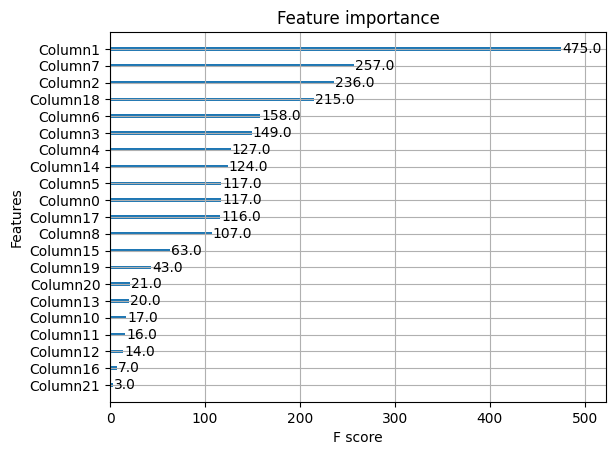

In [35]:
import matplotlib.pyplot as plt

# Plot feature importance
xgb.plot_importance(xgb_model)
plt.show()


In [36]:
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    objective='binary:logistic',  # Change if multi-class classification
    eval_metric='logloss',
    use_label_encoder=False,  # Avoids warning for newer versions
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,  # Learning rate
    max_depth=9,  # Maximum depth of the trees
    alpha=10  # L2 regularization term on weights
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(df_Xtest)

# Evaluate the model
accuracy = accuracy_score(df_Ytest, y_pred)
report = classification_report(df_Ytest, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.93      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712



In [37]:
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [39]:
def objective(trial):
    # Suggest hyperparameters to tune
    param = {
        'objective': 'binary:logistic',  # Change to 'multi:softmax' for multi-class classification
        'eval_metric': 'logloss',
        'use_label_encoder': False,
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 10.0),
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 10.0),
    }
    
    # Train the model
    model = xgb.XGBClassifier(**param)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(df_Xtest)

    # Calculate accuracy
    accuracy = accuracy_score(df_Ytest, y_pred)
    
    return accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)  # Adjust n_trials as needed

[I 2024-08-25 19:00:58,514] A new study created in memory with name: no-name-59266fe3-37ed-4253-bff2-93ab0f139e32
C:\Users\hp\AppData\Local\Temp\ipykernel_16052\23616547.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\hp\AppData\Local\Temp\ipykernel_16052\23616547.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-8, 10.0),
C:\Users\hp\AppData\Local\Temp\ipykernel_16052\23616547.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3

In [40]:
print("Best hyperparameters: ", study.best_params)
print("Best accuracy: ", study.best_value)


Best hyperparameters:  {'n_estimators': 420, 'learning_rate': 0.0198463585243079, 'max_depth': 9, 'subsample': 0.9719714156106742, 'colsample_bytree': 0.8837761343115278, 'alpha': 0.9811379999908134, 'lambda': 0.8483184264893172}
Best accuracy:  0.9782012288316928


In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [52]:
# Initialize the ANN model
model = Sequential()

# Add input layer and the first hidden layer
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))


model.add(Dense(units=16, activation='relu'))


# Add dropout layer (optional, helps prevent overfitting)
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(units=y_train.shape[1], activation='sigmoid'))  # Use 'sigmoid' for binary classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


15655/15703 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.9046 - loss: 0.0000e+00

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


15703/15703 ━━━━━━━━━━━━━━━━━━━━ 14s 853us/step - accuracy: 0.9046 - loss: 0.0000e+00 - val_accuracy: 0.9058 - val_loss: 0.0000e+00
Epoch 2/5
15703/15703 ━━━━━━━━━━━━━━━━━━━━ 14s 892us/step - accuracy: 0.9055 - loss: 0.0000e+00 - val_accuracy: 0.9058 - val_loss: 0.0000e+00
Epoch 3/5
15703/15703 ━━━━━━━━━━━━━━━━━━━━ 14s 888us/step - accuracy: 0.9050 - loss: 0.0000e+00 - val_accuracy: 0.9058 - val_loss: 0.0000e+00
Epoch 4/5
15703/15703 ━━━━━━━━━━━━━━━━━━━━ 12s 790us/step - accuracy: 0.9052 - loss: 0.0000e+00 - val_accuracy: 0.9058 - val_loss: 0.0000e+00
Epoch 5/5
15703/15703 ━━━━━━━━━━━━━━━━━━━━ 12s 790us/step - accuracy: 0.9050 - loss: 0.0000e+00 - val_accuracy: 0.9058 - val_loss: 0.0000e+00


In [54]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(df_Xtest, df_Ytest)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions
y_pred = model.predict(df_Xtest)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(df_Ytest, axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))


8179/8179 ━━━━━━━━━━━━━━━━━━━━ 5s 567us/step - accuracy: 0.9051 - loss: 0.0000e+00
Test Accuracy: 0.91
8179/8179 ━━━━━━━━━━━━━━━━━━━━ 5s 586us/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    261712

    accuracy                           1.00    261712
   macro avg       1.00      1.00      1.00    261712
weighted avg       1.00      1.00      1.00    261712



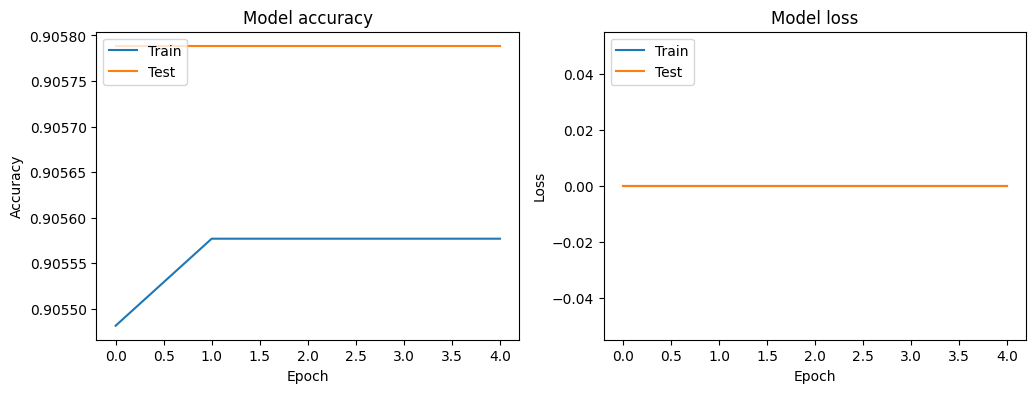

In [55]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [57]:
model = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can adjust kernel, C, and gamma as needed

# Train the model
model.fit(X_train, y_train)

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [58]:
# Make predictions
y_pred = model.predict(df_Xtest)

# Calculate accuracy
accuracy = accuracy_score(df_Ytest, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(df_Ytest, y_pred))

# Compute and plot confusion matrix
cm = confusion_matrix(df_Ytest, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), 
            yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import matplotlib.pyplot as plt

# Example: Scatter plot for a feature vs target
plt.scatter(df_X['Column1'], df_Y['target'], color='blue', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Scatter Plot of Feature 1 vs Target')
plt.show()


In [ ]:
df = pd.concat([df_X, df_Y], axis=1)

In [ ]:
import seaborn as sns

# Example: Pair plot with target variable hue
sns.pairplot(df, hue='target')
plt.show()


In [ ]:
import seaborn as sns

# Example: Box plot for a feature vs target
sns.boxplot(x='target', y='feature1', data=df)
plt.xlabel('Target')
plt.ylabel('Feature 1')
plt.title('Box Plot of Feature 1 by Target')
plt.show()
